# Calculating dNBR for the Dixie Fire in Butte County, California, 2021

The Dixie fire in Butte, Plumas, Lashten, Shasta, and Tehama counties in Northern California was the most destructive of the California 2021 Fire Season.

The fire began on July 13, 2021 and was declared 100% contained on October 25, 2021. 

The goal of this project is to calculate the dNBR from pre- and post- fire in Butte County. using Sentinel-2 data. This helps to understand the severity of vegetation destruction by the fire. This could open up further analysis, for example, to see patterns of fire destruction over the years. 

To read more about the Dixie fire you can visit [this link](https://en.wikipedia.org/wiki/Dixie_Fire).

### Methodology/Calculations

#### 1. Import necessary libraries

In [1]:
from utils import *
import planetary_computer
import rioxarray as rxr
import xarray as xr
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### 2. Initialize Pystac Client

In [2]:
from pystac_client import Client as PystacClient
api_url = "https://earth-search.aws.element84.com/v1"
stac_client = PystacClient.open(api_url)

#### 3. Search for available Sentinel 2 scenes in the center of Butte county and are in the weeks leading up to and after the fire using Pystac Client

In [3]:
point = dict(type="Point", coordinates=(-121.600741, 39.671238)) #coordinates in lat-long format

##### a. Search Pre-Fire Image Collection

In [4]:
pre_datetime = "2021-07-10/2021-07-13"

In [5]:
pre_images = search_api(pre_datetime, point)

4


##### b. Search for Post-Fire Image Collection

In [6]:
post_datetime = "2021-10-26/2021-11-20"

In [7]:
post_images = search_api(post_datetime, point)

18


 #### 4. Evaluate item properties to choose best image from pre- and post- image collection

##### a. Select Pre-Fire Image

In [8]:
for item in pre_images:
    print(item.properties["eo:cloud_cover"])

0.014602
0.175295
0.016234
0.076742


In [9]:
selected_pre_image = pre_images[3] 

##### b. Select Post-Fire Image

In [10]:
for item in post_images:
    print(item.properties["eo:cloud_cover"])

3.552187
1.28479
0.774149
0.363516
99.999489
99.977106
94.280254
76.778311
61.078748
86.844525
98.876047
99.423423
99.727249
99.955231
44.074695
33.184169
94.85204
95.635072


In [11]:
selected_post_image = post_images[3]

##### c. Print asset keys to know band names

In [12]:
assets_pre = selected_pre_image.assets
assets_post = selected_post_image.assets
print(assets_pre.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


#### 5. Print asset urls to open in Rasterio

##### a. Find NIR band url for pre and open in Rasterio

In [13]:
nir_pre_href = assets_pre["nir08"].href
print(nir_pre_href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/T/FK/2021/7/S2B_10TFK_20210713_0_L2A/B8A.tif


In [14]:
#visualize data array
nir_pre = rxr.open_rasterio(nir_pre_href)
nir_pre

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 60MB
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

##### b. Find NIR band url for post

In [15]:
nir_post_href = assets_post["nir08"].href
print(nir_post_href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/T/FK/2021/11/S2B_10TFK_20211120_1_L2A/B8A.tif


In [16]:
nir_post = rxr.open_rasterio(nir_post_href)
nir_post

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 60MB
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

##### c. Find SWIR band url for pre

In [17]:
swir_pre_href = assets_pre["swir16"].href
print(swir_pre_href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/T/FK/2021/7/S2B_10TFK_20210713_0_L2A/B11.tif


In [18]:
swir_pre = rxr.open_rasterio(swir_pre_href)
swir_pre

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 60MB
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

##### d. Find SWIR band url for post

In [19]:
swir_post_href = assets_post["swir16"].href
print(swir_post_href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/10/T/FK/2021/11/S2B_10TFK_20211120_1_L2A/B11.tif


In [20]:
swir_post = rxr.open_rasterio(swir_post_href)
swir_post 

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 60MB
[30140100 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

#### Normalizing each of the data arrays for specific bands at specific times

In [21]:
nir_pre_normalized = normalize(nir_pre)
print(nir_pre_normalized)

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 241MB
array([[[0.29586043, 0.27604005, 0.2911118 , ..., 0.17012491,
         0.17311861, 0.16599566],
        [0.27789821, 0.27263343, 0.28656963, ..., 0.16661505,
         0.17683493, 0.17291215],
        [0.29266027, 0.2864664 , 0.27624652, ..., 0.17342831,
         0.17187984, 0.17580262],
        ...,
        [0.28915041, 0.32270053, 0.32889439, ..., 0.22256633,
         0.22205017, 0.20460411],
        [0.28254362, 0.30060906, 0.2881181 , ..., 0.20749458,
         0.21709508, 0.18344173],
        [0.26437494, 0.27769175, 0.27449159, ..., 0.21781769,
         0.19686177, 0.16775059]]], shape=(1, 5490, 5490))
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0


In [22]:
nir_post_normalized = normalize(nir_post)
print(nir_post_normalized)

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 241MB
array([[[0.11106843, 0.08494975, 0.08283721, ..., 0.07950835,
         0.07681967, 0.07553934],
        [0.12060688, 0.12041483, 0.12630433, ..., 0.08149286,
         0.08034057, 0.07611549],
        [0.1269445 , 0.12214327, 0.12009474, ..., 0.08879073,
         0.08763844, 0.07790794],
        ...,
        [0.12528007, 0.12502401, 0.1183663 , ..., 0.10786761,
         0.09455221, 0.06433647],
        [0.11996671, 0.11785417, 0.10530696, ..., 0.09781704,
         0.08725434, 0.06158377],
        [0.10620319, 0.11113245, 0.11311696, ..., 0.10268229,
         0.08603803, 0.06702516]]], shape=(1, 5490, 5490))
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0


In [23]:
swir_pre_normalized = normalize(swir_pre)
print(swir_pre_normalized)

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 241MB
array([[[0.1813059 , 0.16654741, 0.15796064, ..., 0.24454383,
         0.2450805 , 0.23792487],
        [0.17754919, 0.16788909, 0.16144902, ..., 0.24257603,
         0.23971377, 0.23559928],
        [0.18559928, 0.1852415 , 0.18139535, ..., 0.24051878,
         0.23416816, 0.23488372],
        ...,
        [0.17781753, 0.18237925, 0.18855098, ..., 0.07030411,
         0.08372093, 0.09266547],
        [0.18407871, 0.18282648, 0.18363148, ..., 0.07593918,
         0.09776386, 0.11368515],
        [0.18282648, 0.18542039, 0.18756708, ..., 0.09677996,
         0.09338104, 0.10930233]]], shape=(1, 5490, 5490))
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0


In [24]:
swir_post_normalized = normalize(swir_post)
print(swir_post_normalized)

<xarray.DataArray (band: 1, y: 5490, x: 5490)> Size: 241MB
array([[[0.0438857 , 0.04335775, 0.03867221, ..., 0.12829143,
         0.12921534, 0.1245298 ],
        [0.05451066, 0.05035307, 0.04870323, ..., 0.13594668,
         0.12980928, 0.12287996],
        [0.05517059, 0.04975912, 0.04678941, ..., 0.13713456,
         0.12914934, 0.12393585],
        ...,
        [0.0836798 , 0.08849733, 0.08539563, ..., 0.02586946,
         0.02283376, 0.01775226],
        [0.08381179, 0.0846697 , 0.0805781 , ..., 0.02593546,
         0.02507754, 0.02085396],
        [0.08183198, 0.08579159, 0.08559361, ..., 0.02613344,
         0.02712334, 0.0234277 ]]], shape=(1, 5490, 5490))
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 44kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 44kB 4.5e+06 4.5e+06 4.5e+06 ... 4.39e+06 4.39e+06
    spatial_ref  int64 8B 0


#### 6. Plot SWIR and NIR for each time period for verification of area, scale and data using MatPlotLib

##### a. Plot NIR Pre

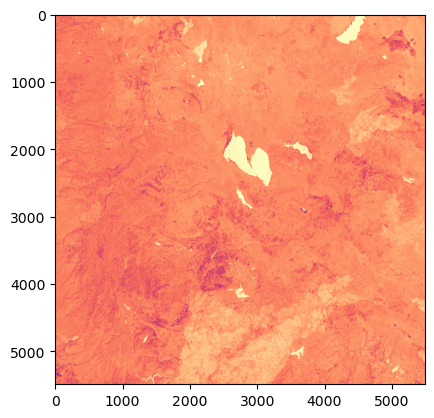

In [25]:
plt.imshow(nir_pre_normalized[0,:,:], cmap="magma_r")

##### b. Plot NIR Post

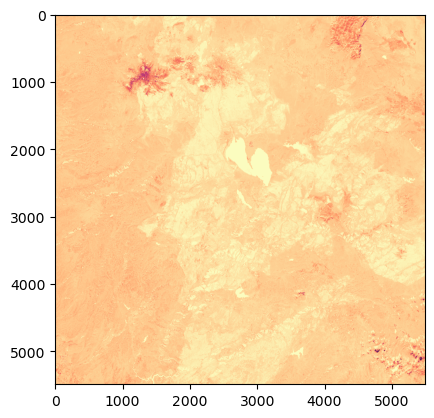

In [26]:
plt.imshow(nir_post_normalized[0, :, :], cmap="magma_r")

##### c. Plot SWIR Pre

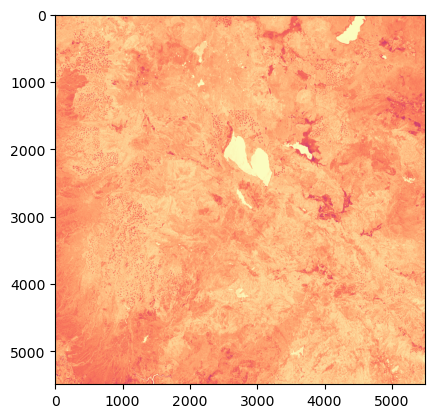

In [27]:
plt.imshow(swir_pre_normalized[0, :, :], cmap="magma_r")

##### d. Plot SWIR Post

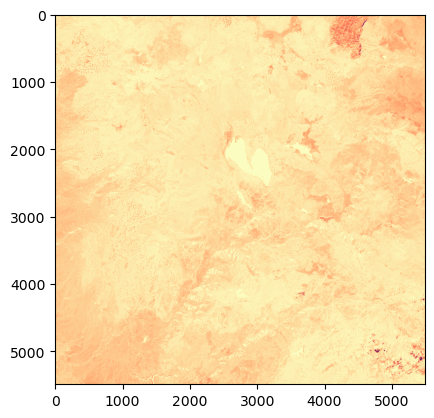

In [28]:
plt.imshow(swir_post_normalized[0, :, :], cmap="magma_r")

#### 7. Calculate NBR for each time period. 

In [29]:
nbr_pre = ((nir_pre_normalized - swir_pre_normalized) / (nir_pre_normalized + swir_pre_normalized))
nbr_post = ((nir_post_normalized - swir_post_normalized) / (nir_post_normalized + swir_post_normalized))

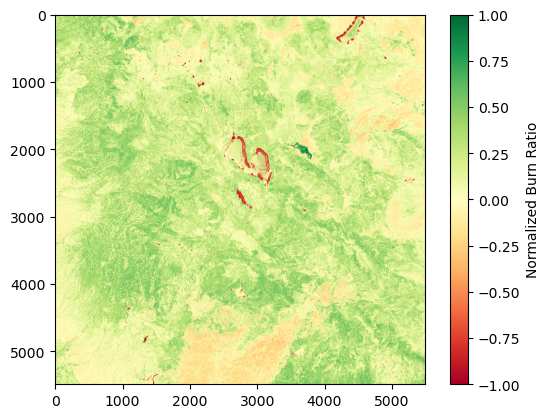

In [30]:
plt.imshow(nbr_pre[0, :, :], cmap="RdYlGn")
plt.colorbar(label = 'Normalized Burn Ratio') #green is healthy vegetation and red is burned area

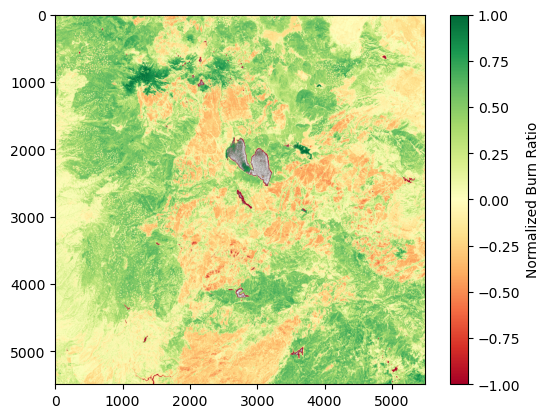

In [31]:
plt.imshow(nbr_post[0, :, :], cmap="RdYlGn")
plt.colorbar(label = 'Normalized Burn Ratio') #green is healthy vegetation and red is burned area

#### 8. Calculate Differenced Normalized Burn Ratio between pre-and post Fire

In [33]:
dNBR = nbr_pre - nbr_post

#### 9. Plot dNBR 

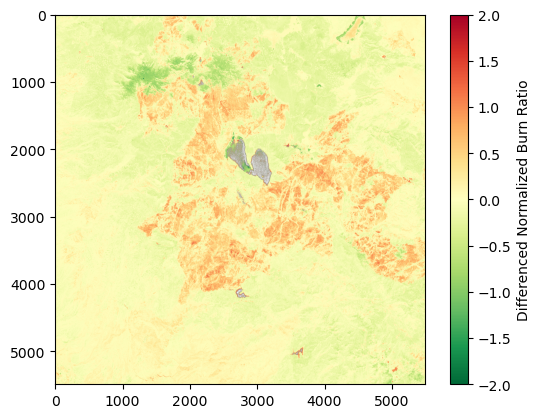

In [34]:
plt.imshow(dNBR[0, :, :], cmap="RdYlGn_r")
plt.colorbar(label = 'Differenced Normalized Burn Ratio')

#### 10. Plot Categorical DNBR and calculate the number of pixels in each category

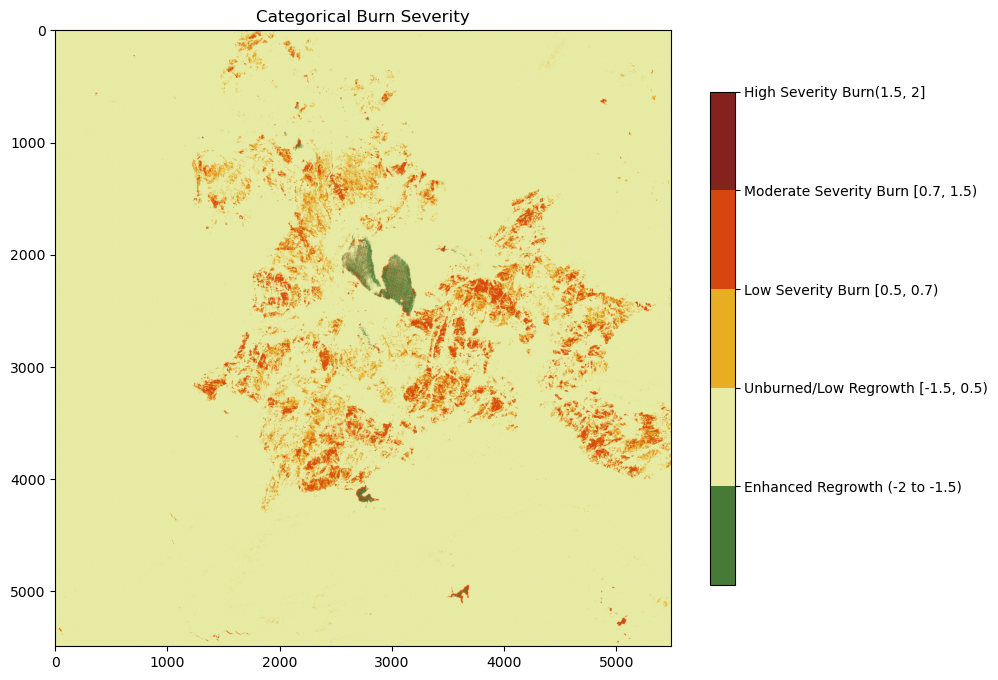

In [35]:
# create categories
burn_severity = np.zeros_like(dNBR) 
burn_severity[dNBR < -1.5] = 0 #Enhanced regrowth
burn_severity[(dNBR >= -1.5) & (dNBR < 0.5)] = 1 #Unburned or low regrowth
burn_severity[(dNBR >= 0.5) & (dNBR < 0.7)] = 2 # Low severity burn
burn_severity[(dNBR >= 0.7) & (dNBR < 1.5)] = 3 # Moderate severity burn
burn_severity[dNBR >= 1.5] = 5 # High severity burn

# Define a custom colormap
colors = ["#487a37", "#e7eba4", "#e8ad23", "#d6470f", "#85221e"]
# color bar labels
labels = ["Enhanced Regrowth (-2 to -1.5)", "Unburned/Low Regrowth [-1.5, 0.5)", "Low Severity Burn [0.5, 0.7)", "Moderate Severity Burn [0.7, 1.5)", "High Severity Burn(1.5, 2]"]

cmap = ListedColormap(colors) # Plot the classified dNBR map
plt.figure(figsize=(10, 8))
plt.title("Categorical Burn Severity")
im = plt.imshow(burn_severity[0, :, :], cmap=cmap)
cbar = plt.colorbar(im, ticks=np.arange(1, 6, 1), shrink=0.8)
cbar.ax.set_yticklabels(labels)
plt.show()

In [36]:
# calculate pixels for each category
enhancedregrowth_pixels = np.count_nonzero(burn_severity == 0) 
print(enhancedregrowth_pixels)
unburned_pixels = np.count_nonzero(burn_severity == 1) 
print(unburned_pixels)
low_severity_pixels = np.count_nonzero(burn_severity == 2)
print(low_severity_pixels)
moderate_severity_pixels = np.count_nonzero(burn_severity == 3)
print(moderate_severity_pixels)
high_severity_pixels = np.count_nonzero(burn_severity == 4)
print(high_severity_pixels)

123970
27856111
1295262
863519
0


Because UTM is not an equal area projection, I hesitate to calculate the area of each burn severity class. In the future, this study may be furthered by reprojecting into an equal area projection and calculating area of each burn severity class. 

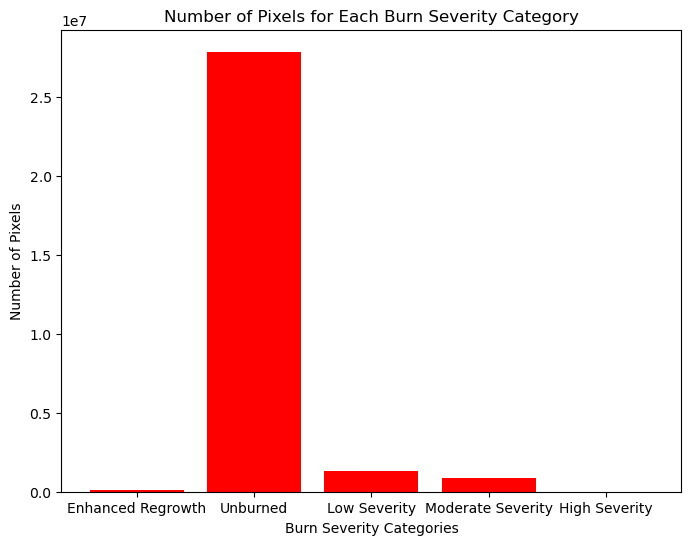

In [41]:
categories = ['Enhanced Regrowth', 'Unburned', 'Low Severity', 'Moderate Severity', 'High Severity'] 
pixels_count = [enhancedregrowth_pixels, unburned_pixels, low_severity_pixels, moderate_severity_pixels, high_severity_pixels] 
plt.figure(figsize=(8, 6)) 
plt.bar(categories, pixels_count, color=['red'])
plt.xlabel('Burn Severity Categories') 
plt.ylabel('Number of Pixels') 
plt.title('Number of Pixels for Each Burn Severity Category') 
plt.show()

## Key Results

In Butte county from July-October 2021, there was no high severity burn. Most of the area was unburned, but there were some low and moderate severity burns, and a slight amount of enhanced regrowth. This might be because of the length of the time interval, because it could be seasonal changes or recovery over the span of 5 months

## Discussion

Originally, I attempted to find the dNBR for the whole fire area, but I ran into problems with mosaicking. So I just decided to focus on one county, . I was also going to find the amount of agricultural land that was impacted by the fire but I ran out of time. I think I was a bit ambitious with what I was trying to do for the study, especially since it is finals season. The Dixie fire would benefit from further study in the agricultural impacts to the region, especially so this can be tracked across fire seasons. What has been done so far can be used in studies on agricultural impacts on big fires in the future. 

Another challenge is that since the fire lasted for five months, this study may benefit from analysis of multiple time points throughout the fire. This will give an idea of the damage across the entire fire time period. Five months difference can lead to vegetation differences and also, regrowth before the fire was completely extinguished. 